# What will we do in this project?

In this project we will take a look at the survival rate of patients with advanced lung cancer using **the Cox proportional-hazards model**.

The Cox proportional-hazards model (Cox, 1972) is essentially a regression model commonly used statistical in medical research for investigating the association between the survival time of patients and one or more predictor variables.


It is very common for different types of businesses for example to study business applications related to subscription models or problems where time is a determining factor for an event to happen.

The advantage of using The Cox proportional-hazards model over other Survival Analysis models is that with this model is possible to use multiple predictors which can be both continuous and binary.



In [6]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [2]:
# Import the data
df = pd.read_csv('lung.csv')

In [3]:
df.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


## How to read the data?

- **inst**: Institution code
- **time**: Survival time in days
- **status**: censoring status 1=censored, 2=dead
- **age**: Age in years
- **sex**: Male=1 Female=2
- **ph.ecog**: ECOG performance score as rated by the physician. 0=asymptomatic, 1= symptomatic but completely ambulatory, 2= in bed <50% of the day, 3= in bed > 50% of the day but not bedbound, 4 = bedbound
- **ph.karno**: Karnofsky performance score (bad=0-good=100) rated by physician
- **pat.karno**: Karnofsky performance score as rated by patient
- **meal.cal**: Calories consumed at meals
- **wt.loss**: Weight loss in last six months

## Cox proportional-hazards model

Cox proportional-hazards model help to determine the relationship between the survival time of a subject and one or more predictor variables.
 
Fomula: $$h(t) = h_{0}(t) * exp(b_{1} * x_{1} + b_{n} * x_{n})$$ 


where $$h_{0}(t)$$ 

is the Baseline Hazard that represents the hazard when all of the predictors (or independent variables) X1, Xn are equal to zero. It is analogous to the intercept term in a multiple regression or logistic regression model.


where $$b_{n}$$ 

rapresents the impact coefficients of the other predictors X1, Xn.


### Prepare the Dataset

In [4]:
# trasform dependend variable
df.loc[df['status'] == 1, 'status'] = 0
df.loc[df['status'] == 2, 'status'] = 1

In [5]:
# drop NaN
df = df.dropna()

## We can start to train and fit our model.

In [7]:
model = CoxPHFitter()
model.fit(df, 'time', event_col='status')

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>

### Censoring
One aspect that makes survival analysis difficult is the concept of censoring. What this means is that when a subject under obsevation is censored we don’t know the true survival time. 

**Right-censoring**:
Right-censoring, the most common type of censoring it happens when the subject under observation is still alive.

**Left-censoting**:
In contrast to right-censoring, left censoring occurs when the person’s true survival time is less than or equal to the observed survival time. 

**Interval-censoring**:
Interval-censoring occurs in survival analysis when the time until an event of interest is not known precisely (and instead, only is known to fall into a particular interval).

In [8]:
model.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -491.27
         time fit was run = 2022-11-19 10:27:42 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
inst       -0.03       0.97       0.01            -0.06            -0.00                 0.95                 1.00
age         0.01       1.01       0.01            -0.01             0.04                 0.99                 1.04
sex        -0.57       0.57       0.20            -0.96            -0.17                 0.38                 0.84
ph.ecog     0.91       2.48       0.24             0.44             1.38                 1.55                 3.96
ph.karno    0.03       1.03       0.01             0.00             0.05                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.02       0.98       0.01            -0.03            -0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
inst          0.00 -2.31   0.02       5.60
age           0.00  1.07   0.28       1.82
sex           0.00 -2.81 <0.005       7.68
ph.ecog       0.00  3.80 <0.005      12.77
ph.karno      0.00  2.29   0.02       5.49
pat.karno     0.00 -1.34   0.18       2.47
meal.cal      0.00  0.01   0.99       0.01
wt.loss       0.00 -2.11   0.03       4.85
---
Concordance = 0.65
Partial AIC = 998.54
log-likelihood ratio test = 33.70 on 8 df
-log2(p) of ll-ratio test = 14.41

## How to read these results?

First we can look at column P which shows us the P-value of the coefficients, if the p-value is greater than 0.05 we conclude that that coefficient is not statistically significant and therefore that predictor has no significant impact on the dependent variable.

Then we observe the exp(coef): if it is greater than 1 that predictor has a positive impact on the dependent variable, in our case it increases the likehood of death. For an exp(coef) lower than 1 the impact will be negative.

<AxesSubplot:xlabel='log(HR) (95% CI)'>

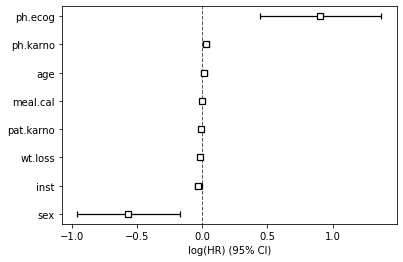

In [10]:
model.plot()

## How to read these results?

**The ECOG performance score as rated by the physicia has a strong and positive impact on the likelihood of dead therefore if we go from analyzing a subject 0=asymptomatic to a subject 1= symptomatic but completely ambulatory and so on the likelihood of death increases.**


**The sex predictor has a negative impact on the likelihood of dead therefore if we go from analyzing a 1=male subject to a 2=female subject the likelihood of death decreases .**